In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [3]:
df2 = pd.read_csv('matches.csv')
df2.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [4]:
match1 = df2[(df2['team1'] == 'Mumbai Indians') & (df2['team2'] == 'Rajasthan Royals')]
match2 = df2[(df2['team1'] == 'Rajasthan Royals') & (df2['team2'] == 'Mumbai Indians')]

Match1 = Mumbai Home Ground

Match2 = Rajasthan Home Ground

# Overall Mumbai vs Rajasthan:

In [5]:
match = pd.concat((match1,match2))
match.head()

id  season    city        date           team1             team2  \
112  113    2008  Jaipur  2008-05-26  Mumbai Indians  Rajasthan Royals   
175  176    2010  Mumbai  2010-03-13  Mumbai Indians  Rajasthan Royals   
218  219    2010  Jaipur  2010-04-11  Mumbai Indians  Rajasthan Royals   
266  267    2011  Jaipur  2011-04-29  Mumbai Indians  Rajasthan Royals   
298  299    2011  Mumbai  2011-05-20  Mumbai Indians  Rajasthan Royals   

          toss_winner toss_decision  result  dl_applied            winner  \
112  Rajasthan Royals         field  normal           0  Rajasthan Royals   
175    Mumbai Indians           bat  normal           0    Mumbai Indians   
218  Rajasthan Royals         field  normal           0    Mumbai Indians   
266  Rajasthan Royals         field  normal           0  Rajasthan Royals   
298    Mumbai Indians           bat  normal           0  Rajasthan Royals   

     win_by_runs  win_by_wickets player_of_match                   venue  \
112            0               5   Sohail Tanvir  Sawai Mansingh Stadium   
175            4               0       YK Pathan       Brabourne Stadium   
218           37               0    SR Tendulkar  Sawai Mansingh Stadium   
266            0               7         J Botha  Sawai Mansingh Stadium   
298            0              10       SR Watson        Wankhede Stadium   

         umpire1      umpire2 umpire3  
112    BF Bowden  K Hariharan     NaN  
175  RE Koertzen    RB Tiffin     NaN  
218  BR Doctrove  SK Tarapore     NaN  
266    Asad Rauf  SK Tarapore     NaN  
298  RE Koertzen   PR Reiffel     NaN

Matches played between Mumbai and Rajasthan.

In [6]:
match.shape

(20, 18)

In [7]:
match['winner'].value_counts()

Mumbai Indians      10
Rajasthan Royals    10
Name: winner, dtype: int64

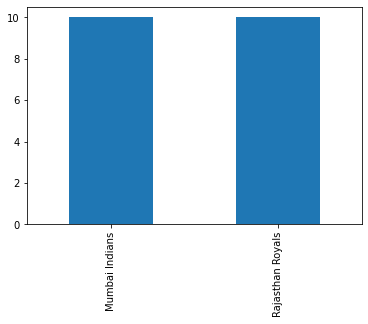

In [8]:
match['winner'].value_counts().plot.bar()
plt.show()

Mumbai and Rajasthan both won 10 times against each other.

In [9]:
match['toss_winner'].value_counts()

Rajasthan Royals    13
Mumbai Indians       7
Name: toss_winner, dtype: int64

In [10]:
match['toss_decision'].value_counts()

field    11
bat       9
Name: toss_decision, dtype: int64

In [11]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts()

Rajasthan Royals    7
Mumbai Indians      4
Name: winner, dtype: int64

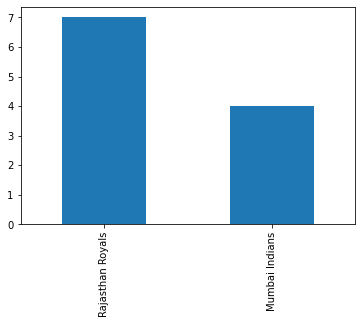

In [12]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts().plot.bar()
plt.show()

Rajsthan won the toss and won the match 7 times whereas Mumbai 4 times. So winning toss does have much affect to winning the match. Rajasthan won 7 out of 10 times after winning toss.

In [13]:
ids = list(match['id'])
delivery = df1[df1['match_id'].isin(ids)]
delivery.head()

match_id  inning      batting_team    bowling_team  over  ball  \
20024        86       1  Rajasthan Royals  Mumbai Indians     1     1   
20025        86       1  Rajasthan Royals  Mumbai Indians     1     2   
20026        86       1  Rajasthan Royals  Mumbai Indians     1     3   
20027        86       1  Rajasthan Royals  Mumbai Indians     1     4   
20028        86       1  Rajasthan Royals  Mumbai Indians     1     5   

           batsman  non_striker      bowler  is_super_over  ...  bye_runs  \
20024     GC Smith  SA Asnodkar  SM Pollock              0  ...         0   
20025     GC Smith  SA Asnodkar  SM Pollock              0  ...         0   
20026  SA Asnodkar     GC Smith  SM Pollock              0  ...         0   
20027     GC Smith  SA Asnodkar  SM Pollock              0  ...         0   
20028     GC Smith  SA Asnodkar  SM Pollock              0  ...         0   

       legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
20024            0            0             0             0           0   
20025            0            0             0             1           0   
20026            0            0             0             1           0   
20027            0            0             0             0           0   
20028            0            0             0             1           0   

       total_runs  player_dismissed dismissal_kind fielder  
20024           0               NaN            NaN     NaN  
20025           1               NaN            NaN     NaN  
20026           1               NaN            NaN     NaN  
20027           0               NaN            NaN     NaN  
20028           1               NaN            NaN     NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Mumbai and Rajasthan.

In [14]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## Calculate BIS(Batsman Intimidation Score).

In [26]:
bis_dict = {}
batsman = ['Q de Kock', 'HH Pandya', 'KH Pandya', 'Ishan Kishan', 'SA Yadav', 'RG Sharma', 'KA Pollard', 'R Parag', 'BA Stokes', 'SPD Smith', 'SV Samson', 'JC Buttler']
for j in batsman:
    bis_list = []
    for k in ids:
        batsman_runs = list(delivery[(delivery['match_id'] == k) & (delivery['batsman'] == j)]['batsman_runs'])
        total_run = np.sum(batsman_runs)
        boundary_run = 0
        without_boundary_run = 0
        for i in batsman_runs:
            if i == 4 or i == 6:
                boundary_run += i
            elif i == 1 or i == 2 or i == 3:
                without_boundary_run += i
        total_ball = len(batsman_runs)
        if total_ball > 0:
            bis = ((total_run + boundary_run) - (without_boundary_run * 0.5)) / total_ball
        else:
            bis = -999
        if bis != -999:
            bis_list.append(bis)
            if j not in bis_dict:
                bis_dict[j] = bis_list
            else:
                bis_dict[j].append(bis)
        else:
            continue
for k,v in bis_dict.items():
    bis_dict[k] = np.round(np.mean(v),2)
bis_dict

{'Q de Kock': 1.9,
 'HH Pandya': 2.87,
 'KH Pandya': 0.62,
 'Ishan Kishan': 1.95,
 'RG Sharma': 1.29,
 'KA Pollard': 1.83,
 'R Parag': 2.1,
 'BA Stokes': 0.55,
 'SPD Smith': 1.2,
 'SV Samson': 1.75,
 'JC Buttler': 2.58}

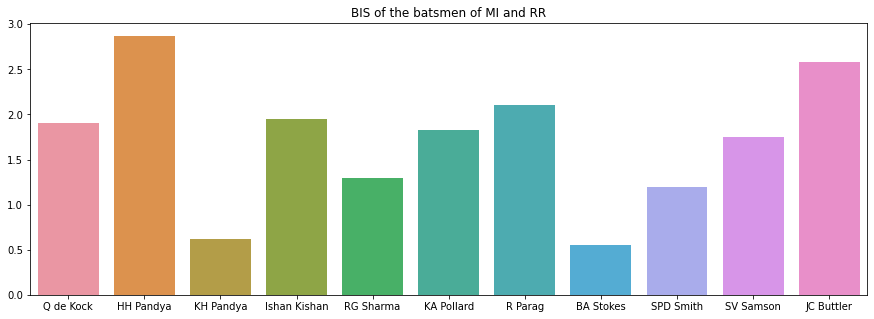

In [29]:
bis = pd.Series(list(bis_dict.values()),index = list(bis_dict.keys()))
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = bis.index, y = bis,ax=ax)
plt.title('BIS of the batsmen of MI and RR')
plt.show()

So we can see, HH Pandya has the highest BIS(Batsman Intimidation Score) and then JC Buttler.

In [27]:
bis_dict_overall = {}
batsman_overall = ['Q de Kock', 'HH Pandya', 'KH Pandya', 'Ishan Kishan', 'SA Yadav', 'RG Sharma', 'KA Pollard', 'R Parag', 'BA Stokes', 'SPD Smith', 'SV Samson', 'JC Buttler', 'RV Uthappa', 'R Tewatia']
total_ids = list(df1[df1['batsman'].isin(batsman_overall)]['match_id'].unique())
for j in batsman_overall:
    bis_list = []
    for k in total_ids:
        batsman_runs = list(df1[(df1['match_id'] == k) & (df1['batsman'] == j)]['batsman_runs'])
        total_run = np.sum(batsman_runs)
        boundary_run = 0
        without_boundary_run = 0
        for i in batsman_runs:
            if i == 4 or i == 6:
                boundary_run += i
            elif i == 1 or i == 2 or i == 3:
                without_boundary_run += i
        total_ball = len(batsman_runs)
        if total_ball > 0:
            bis = ((total_run + boundary_run) - (without_boundary_run * 0.5)) / total_ball
        else:
            bis = -999
        if bis != -999:
            bis_list.append(bis)
            if j not in bis_dict_overall:
                bis_dict_overall[j] = bis_list
            else:
                bis_dict_overall[j].append(bis)
        else:
            continue
for k,v in bis_dict_overall.items():
    bis_dict_overall[k] = np.round(np.mean(v),2)
bis_dict_overall

{'Q de Kock': 1.7,
 'HH Pandya': 2.07,
 'KH Pandya': 1.91,
 'Ishan Kishan': 1.66,
 'SA Yadav': 1.93,
 'RG Sharma': 1.51,
 'KA Pollard': 1.81,
 'R Parag': 1.99,
 'BA Stokes': 1.46,
 'SPD Smith': 1.58,
 'SV Samson': 1.46,
 'JC Buttler': 1.96,
 'RV Uthappa': 1.62,
 'R Tewatia': 1.56}

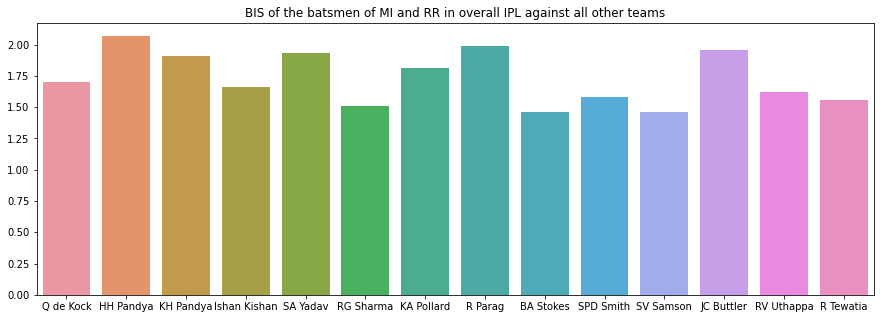

In [28]:
bis_overall = pd.Series(list(bis_dict_overall.values()),index = list(bis_dict_overall.keys()))
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = bis_overall.index, y = bis_overall,ax=ax)
plt.title('BIS of the batsmen of MI and RR in overall IPL against all other teams')
plt.show()

So we can see, HH Pandya has the highest BIS(Batsman Intimidation Score) and followed by R Parag, JC Buttler. We cannot consider R Parag as he played very less matches than other players.

## Which batsman has best (number of runs scored of boundaries: total runs scored) ratio:

In [64]:
ratio_dict = {}
batsman = ['Q de Kock', 'HH Pandya', 'KH Pandya', 'Ishan Kishan', 'AS Yadav', 'RG Sharma', 'KA Pollard', 'R Parag', 'BA Stokes', 'SPD Smith', 'SV Samson', 'JC Buttler']
for j in batsman:
    batsman_runs = list(delivery[delivery['batsman'] == j]['batsman_runs'])
    total_run = np.sum(batsman_runs)
    boundary_run = 0
    for i in batsman_runs:
        if i == 4 or i == 6:
            boundary_run += i
    if total_run > 0:
        ratio = (boundary_run/total_run)*100
    else:
        ratio = -999
    if ratio != -999:
        ratio_dict[j] = ratio
ratio_dict

{'Q de Kock': 56.00000000000001,
 'HH Pandya': 65.97938144329896,
 'KH Pandya': 30.76923076923077,
 'Ishan Kishan': 56.00000000000001,
 'AS Yadav': 52.63157894736842,
 'RG Sharma': 59.591836734693885,
 'KA Pollard': 64.40677966101694,
 'R Parag': 59.09090909090909,
 'BA Stokes': 42.857142857142854,
 'SPD Smith': 43.93063583815029,
 'SV Samson': 59.07692307692308,
 'JC Buttler': 72.91666666666666}

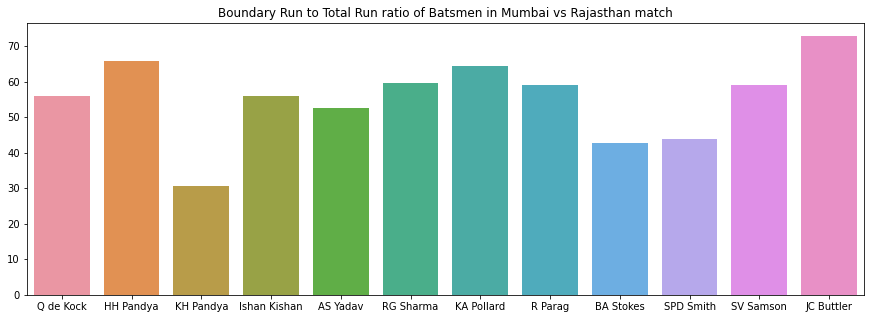

In [66]:
batsman_ratio = pd.Series(list(ratio_dict.values()),index = list(ratio_dict.keys()))
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = batsman_ratio.index, y = batsman_ratio,ax=ax)
plt.title('Boundary Run to Total Run ratio of Batsmen in Mumbai vs Rajasthan match')
plt.show()

JC Buttler has the highest ratio followed by HH Pandya and KA Pollard in Mumbai vs Rajasthan match.

In [67]:
ratio_dict_overall = {}
batsman_overall = ['Q de Kock', 'HH Pandya', 'KH Pandya', 'Ishan Kishan', 'AS Yadav', 'RG Sharma', 'KA Pollard', 'R Parag', 'BA Stokes', 'SPD Smith', 'SV Samson', 'JC Buttler', 'RV Uthappa', 'R Tewatia']
for j in batsman_overall:
    batsman_runs = list(df1[df1['batsman'] == j]['batsman_runs'])
    total_run = np.sum(batsman_runs)
    boundary_run = 0
    for i in batsman_runs:
        if i == 4 or i == 6:
            boundary_run += i
    if total_run > 0:
        ratio = (boundary_run/total_run)*100
    else:
        ratio = -999
    if ratio != -999:
        ratio_dict_overall[j] = ratio
ratio_dict_overall

{'Q de Kock': 63.66689053055742,
 'HH Pandya': 63.1484794275492,
 'KH Pandya': 60.983606557377044,
 'Ishan Kishan': 65.82278481012658,
 'AS Yadav': 61.32542037586548,
 'RG Sharma': 58.770858770858766,
 'KA Pollard': 63.86494252873563,
 'R Parag': 57.98816568047337,
 'BA Stokes': 49.76816074188562,
 'SPD Smith': 49.73131411822179,
 'SV Samson': 54.49664429530201,
 'JC Buttler': 65.54856743535989,
 'RV Uthappa': 60.27890238416555,
 'R Tewatia': 52.10084033613446}

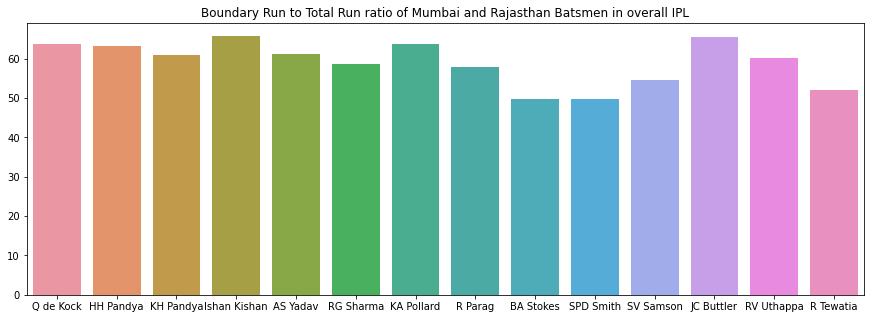

In [68]:
batsman_ratio_overall = pd.Series(list(ratio_dict_overall.values()),index = list(ratio_dict_overall.keys()))
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = batsman_ratio_overall.index, y = batsman_ratio_overall,ax=ax)
plt.title('Boundary Run to Total Run ratio of Mumbai and Rajasthan Batsmen in overall IPL')
plt.show()

JC Buttler has the highest ratio followed by Ishan Kishan, KA Pollard and HH Pandya in overall IPL.

## How many balls more/less will RR take to reach 100 as compared to MI.

In [81]:
ball_taken_mumbai = []
ball_taken_rajasthan = []
for j in ids:
    runs_mumbai = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Mumbai Indians')]['total_runs'])
    wide_runs_mumbai = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Mumbai Indians')]['wide_runs'])
    noball_runs_mumbai = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Mumbai Indians')]['noball_runs'])
    s_mumbai = 0
    l_mumbai = []
    wide_mumbai = 0
    noball_mumbai = 0
    total_balls_mumbai = 0
    for i in range(0,len(runs_mumbai)):
        s_mumbai += runs_mumbai[i]
        l_mumbai.append(runs_mumbai[i])
        if wide_runs_mumbai[i] > 0:
            wide_mumbai += 1
        elif noball_runs_mumbai[i] > 0:
            noball_mumbai += 1
        if s_mumbai >= 100:
            break
    if s_mumbai >= 100:
        total_balls_mumbai = len(l_mumbai) - wide_mumbai - noball_mumbai
    if total_balls_mumbai > 0:
        ball_taken_mumbai.append(total_balls_mumbai)
    runs_rajasthan = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Rajasthan Royals')]['total_runs'])
    wide_runs_rajasthan = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Rajasthan Royals')]['wide_runs'])
    noball_runs_rajasthan = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] == 'Rajasthan Royals')]['noball_runs'])
    s_rajasthan = 0
    l_rajasthan = []
    wide_rajasthan = 0
    noball_rajasthan = 0
    total_balls_rajasthan = 0
    for i in range(0,len(runs_rajasthan)):
        s_rajasthan += runs_rajasthan[i]
        l_rajasthan.append(runs_rajasthan[i])
        if wide_runs_rajasthan[i] > 0:
            wide_rajasthan += 1
        elif noball_runs_rajasthan[i] > 0:
            noball_rajasthan += 1
        if s_rajasthan >= 100:
            break
    if s_rajasthan >= 100:
        total_balls_rajasthan = len(l_rajasthan) - wide_rajasthan - noball_rajasthan
    if total_balls_rajasthan > 0:
        ball_taken_rajasthan.append(total_balls_rajasthan)
print(ball_taken_rajasthan)
print(ball_taken_mumbai)
np.mean(np.abs(pd.Series(ball_taken_mumbai) - pd.Series(ball_taken_rajasthan)))

[100, 70, 101, 63, 74, 85, 94, 83, 68, 72, 69, 59, 63, 88, 81, 81, 68, 82, 76]
[94, 60, 81, 97, 74, 70, 74, 97, 79, 63, 72, 68, 70, 87, 90, 68, 72, 52]


11.944444444444445

So the diff between total balls taken by Mumbai and Rajasthan to reach 100 team runs is ~12 in an average of Mumbai vs Rajasthan match.

In [84]:
ball_taken_mumbai_overall = []
total_ids = list(df1[df1['batting_team'] == 'Mumbai Indians']['match_id'].unique())
for j in total_ids:
    runs_mumbai = list(df1[(df1['match_id'] == j) & (df1['batting_team'] == 'Mumbai Indians')]['total_runs'])
    wide_runs_mumbai = list(df1[(df1['match_id'] == j) & (df1['batting_team'] == 'Mumbai Indians')]['wide_runs'])
    noball_runs_mumbai = list(df1[(df1['match_id'] == j) & (df1['batting_team'] == 'Mumbai Indians')]['noball_runs'])
    s_mumbai = 0
    l_mumbai = []
    wide_mumbai = 0
    noball_mumbai = 0
    total_balls_mumbai = 0
    for i in range(0,len(runs_mumbai)):
        s_mumbai += runs_mumbai[i]
        l_mumbai.append(runs_mumbai[i])
        if wide_runs_mumbai[i] > 0:
            wide_mumbai += 1
        elif noball_runs_mumbai[i] > 0:
            noball_mumbai += 1
        if s_mumbai >= 100:
            break
    if s_mumbai >= 100:
        total_balls_mumbai = len(l_mumbai) - wide_mumbai - noball_mumbai
    if total_balls_mumbai > 0:
        ball_taken_mumbai_overall.append(total_balls_mumbai)
print(ball_taken_mumbai_overall)
np.mean(ball_taken_mumbai_overall)

[73, 76, 76, 95, 72, 47, 88, 81, 77, 80, 70, 91, 53, 79, 85, 82, 106, 85, 73, 86, 91, 79, 75, 87, 75, 58, 83, 67, 71, 94, 84, 82, 52, 107, 99, 102, 90, 108, 88, 74, 90, 95, 78, 60, 54, 89, 75, 65, 90, 77, 81, 94, 87, 81, 81, 76, 99, 81, 87, 79, 79, 103, 85, 89, 81, 92, 75, 111, 97, 81, 74, 89, 90, 116, 100, 74, 79, 87, 67, 109, 110, 75, 93, 71, 86, 105, 68, 77, 91, 95, 72, 81, 86, 78, 62, 86, 102, 104, 82, 102, 83, 70, 87, 69, 72, 90, 91, 98, 86, 105, 85, 76, 78, 91, 75, 92, 74, 63, 60, 52, 74, 90, 99, 97, 79, 71, 77, 74, 79, 64, 91, 89, 68, 91, 72, 71, 61, 113, 65, 103, 85, 73, 73, 71, 69, 80, 93, 98, 73, 69, 73, 81, 49, 56, 63, 72, 75, 77, 62, 72, 72, 69, 70, 70, 75, 64, 92, 105, 72, 68, 60, 81, 70, 71, 67, 78, 79, 78, 86]


80.89385474860335

Mumbai took ~81 balls in an average to score 100 runs in overall IPL.

In [86]:
ball_taken_rajasthan_overall = []
total_ids = list(df1[df1['batting_team'] == 'Rajasthan Royals']['match_id'].unique())
for j in total_ids:
    runs_rajasthan = list(df1[(df1['match_id'] == j) & (df1['batting_team'] == 'Rajasthan Royals')]['total_runs'])
    wide_runs_rajasthan = list(df1[(df1['match_id'] == j) & (df1['batting_team'] == 'Rajasthan Royals')]['wide_runs'])
    noball_runs_rajasthan = list(df1[(df1['match_id'] == j) & (df1['batting_team'] == 'Rajasthan Royals')]['noball_runs'])
    s_rajasthan = 0
    l_rajasthan = []
    wide_rajasthan = 0
    noball_rajasthan = 0
    total_balls_rajasthan = 0
    for i in range(0,len(runs_rajasthan)):
        s_rajasthan += runs_rajasthan[i]
        l_rajasthan.append(runs_rajasthan[i])
        if wide_runs_rajasthan[i] > 0:
            wide_rajasthan += 1
        elif noball_runs_rajasthan[i] > 0:
            noball_rajasthan += 1
        if s_rajasthan >= 100:
            break
    if s_rajasthan >= 100:
        total_balls_rajasthan = len(l_rajasthan) - wide_rajasthan - noball_rajasthan
    if total_balls_rajasthan > 0:
        ball_taken_rajasthan_overall.append(total_balls_rajasthan)
print(ball_taken_rajasthan_overall)
np.mean(ball_taken_rajasthan_overall)

[93, 68, 51, 80, 65, 77, 88, 72, 75, 75, 66, 75, 58, 100, 65, 78, 86, 106, 94, 92, 92, 63, 89, 91, 102, 81, 98, 119, 70, 94, 72, 71, 66, 65, 85, 59, 71, 51, 101, 98, 83, 93, 73, 88, 80, 79, 94, 80, 79, 79, 63, 74, 82, 74, 95, 83, 65, 89, 87, 84, 85, 69, 78, 106, 77, 99, 81, 78, 90, 89, 95, 68, 90, 68, 89, 76, 88, 73, 75, 87, 80, 85, 113, 91, 82, 88, 67, 99, 85, 78, 78, 114, 79, 78, 69, 94, 94, 76, 83, 77, 83, 95, 69, 73, 90, 68, 82, 74, 93, 56, 102, 84, 73, 69, 78, 71, 72, 88, 52, 71, 75, 66, 69, 71, 74, 74, 67, 70, 81, 70, 88, 81, 59, 63, 63, 62, 72, 73, 102]


80.0

Rajasthan took ~80 balls in an average to score 100 runs in overall IPL.

## Calculate BLS(Bowler Lethality Score):

In [19]:
bls_dict = {}
bowlers = ['RD Chahar', 'HH Pandya', 'KH Pandya', 'MJ McClenaghan', 'JJ Bumrah', 'KA Pollard', 'R Parag', 'BA Stokes', 'S Gopal', 'JD Unadkat', 'J Archer']
for j in bowlers:
    bls_list = []
    for k in ids:
        batsman_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['batsman_runs'])
        wide_balls = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['wide_runs'])
        no_balls = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['noball_runs'])
        total_balls = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['ball'])
        legal_balls = len(total_balls)
        dot_balls = 0
        six = 0
        four = 0
        boundary_runs = 0
        boundary_count = 0
        for i in range(len(batsman_runs)):
            if (batsman_runs[i] == 0) & (wide_balls[i] == 0) & (no_balls[i] == 0):
                dot_balls += 1
            if wide_balls[i] != 0:
                legal_balls -= 1
            elif no_balls[i] != 0:
                legal_balls -= 1
            if batsman_runs[i] == 4 or batsman_runs[i] == 6:
                boundary_runs += batsman_runs[i]
                boundary_count += 1
        wickets = delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j) & (delivery['dismissal_kind'] != 'run out')]['player_dismissed'].count()
        if (legal_balls - (dot_balls*2.5))>0 and boundary_count>0:
            bls = ((wickets+(dot_balls*2) - (boundary_runs/boundary_count))/(legal_balls - (dot_balls*2.5)))
        else:
            bls = -999
        if bls != -999:
            bls_list.append(bls)
            if j not in bls_dict:
                bls_dict[j] = bls_list
            else:
                bls_dict[j].append(bls)
for k,v in bls_dict.items():
    bls_dict[k] = np.mean(v)
bls_dict

{'RD Chahar': 0.7777777777777778,
 'HH Pandya': 0.8547008547008547,
 'KH Pandya': 1.8125204315135666,
 'MJ McClenaghan': 1.1818181818181819,
 'JJ Bumrah': 2.29025641025641,
 'KA Pollard': 1.3287037037037037,
 'R Parag': -0.2857142857142857,
 'BA Stokes': 0.9696969696969696,
 'S Gopal': 1.3908521303258146,
 'JD Unadkat': 2.603854875283446,
 'J Archer': 1.1333333333333333}

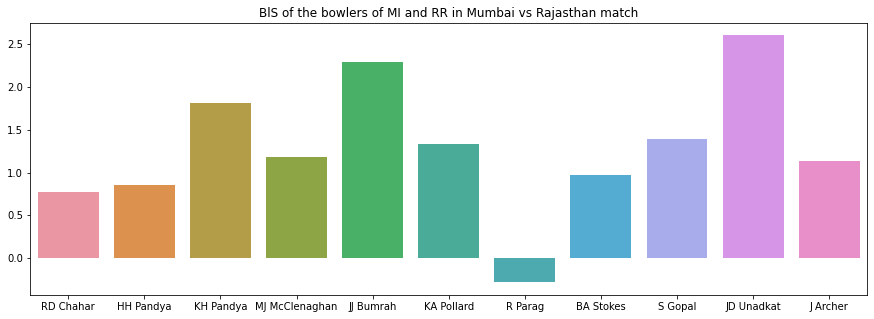

In [20]:
bls = pd.Series(list(bls_dict.values()),index = list(bls_dict.keys()))
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = bls.index, y = bls,ax=ax)
plt.title('BlS of the bowlers of MI and RR in Mumbai vs Rajasthan match')
plt.show()

JD Unadkat has the best BLS followed by JJ Bumrah and KH Pandya in Mumbai vs Rajasthan match.

In [21]:
bls_dict_overall = {}
bowlers_overall = ['RD Chahar', 'HH Pandya', 'KH Pandya', 'MJ McClenaghan', 'JJ Bumrah', 'KA Pollard', 'R Parag', 'BA Stokes', 'S Gopal', 'JD Unadkat', 'J Archer', 'R Tewatia', 'T Curran', 'AJ Tye', 'AS Rajpoot', 'M Markande', 'VR Aaron', 'O Thomas', 'DS Kulkarni', 'NM Coulter-Nile', 'TA Boult']
total_ids = list(df1[df1['bowler'].isin(bowlers_overall)]['match_id'].unique())
for j in bowlers_overall:
    bls_list = []
    for k in total_ids:
        batsman_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['batsman_runs'])
        wide_balls = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['wide_runs'])
        no_balls = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['noball_runs'])
        total_balls = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['ball'])
        legal_balls = len(total_balls)
        dot_balls = 0
        six = 0
        four = 0
        boundary_runs = 0
        boundary_count = 0
        for i in range(len(batsman_runs)):
            if (batsman_runs[i] == 0) & (wide_balls[i] == 0) & (no_balls[i] == 0):
                dot_balls += 1
            if wide_balls[i] != 0:
                legal_balls -= 1
            elif no_balls[i] != 0:
                legal_balls -= 1
            if batsman_runs[i] == 4 or batsman_runs[i] == 6:
                boundary_runs += batsman_runs[i]
                boundary_count += 1
        wickets = df1[(df1['match_id'] == k) & (df1['bowler'] == j) & (df1['dismissal_kind'] != 'run out')]['player_dismissed'].count()
        if (legal_balls - (dot_balls*2.5))>0 and boundary_count>0:
            bls = ((wickets+(dot_balls*2) - (boundary_runs/boundary_count))/(legal_balls - (dot_balls*2.5)))
        else:
            bls = -999
        if bls != -999:
            bls_list.append(bls)
            if j not in bls_dict_overall:
                bls_dict_overall[j] = bls_list
            else:
                bls_dict_overall[j].append(bls)
for k,v in bls_dict_overall.items():
    bls_dict_overall[k] = np.mean(v)
bls_dict_overall

{'RD Chahar': 3.7777777777777777,
 'HH Pandya': 1.1635435800891973,
 'KH Pandya': 2.469482951141833,
 'MJ McClenaghan': 3.1287713681916576,
 'JJ Bumrah': 4.953962711102428,
 'KA Pollard': 1.055210400304203,
 'R Parag': -0.13981448658868006,
 'BA Stokes': 3.57612181725085,
 'S Gopal': 2.6657588999694264,
 'JD Unadkat': 2.995099339783574,
 'J Archer': 2.4582660117186967,
 'R Tewatia': 2.186759991145956,
 'T Curran': -0.46057399390732723,
 'AJ Tye': 2.7831706314798104,
 'AS Rajpoot': 3.590772936740678,
 'M Markande': 1.6675221815221815,
 'VR Aaron': 3.2643197554761993,
 'O Thomas': 1.2338217338217337,
 'DS Kulkarni': 4.51686156922999,
 'NM Coulter-Nile': 5.378876678876679,
 'TA Boult': 4.260731763553414}

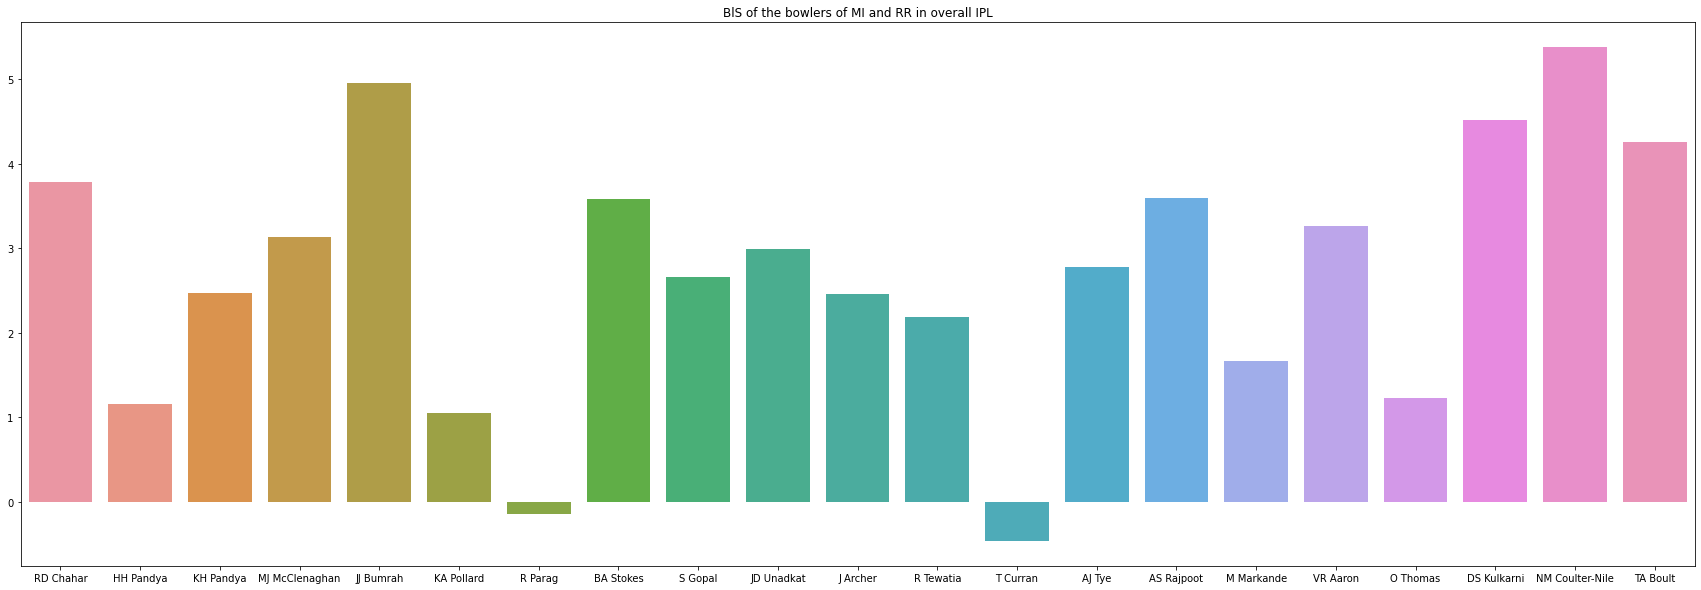

In [23]:
bls_overall = pd.Series(list(bls_dict_overall.values()),index = list(bls_dict_overall.keys()))
fig, ax = plt.subplots(figsize=(30,10))
sns.barplot(x = bls_overall.index, y = bls_overall,ax=ax)
plt.title('BlS of the bowlers of MI and RR in overall IPL')
plt.show()

NM Coulter-Nile has the best BLS followed by JJ Bumrah, DS KUlkarni and TA Boult in overall IPL.